In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import warnings
warnings.filterwarnings('ignore')

#modeling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#For SMOTE given imbalance
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.tree import plot_tree
from sklearn.tree import export_text

In [83]:
#Reading in the loan CSV
loan = pd.read_csv('application_train.csv')

In [84]:
loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
loan.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [86]:
loan.shape

(307511, 122)

In [87]:
#Reviewing mix of funded loans in the global dataset
loan['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

## The default rate is only ~8% implying imbalance in the target variable

In [88]:
#Seeing missing values
loan.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [89]:
#Dropping multiple variables for this exercise
loan.drop(columns = ['SK_ID_CURR','CODE_GENDER', 'CNT_CHILDREN', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE','NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'OWN_CAR_AGE', 
                     'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
                     'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 
                     'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE','FLOORSMIN_MODE',
                     'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 
                     'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 
                     'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 
                     'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
                     'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
                     'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                        'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                        'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                         'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                         'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 
                         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_EMPLOYED'
                    ], inplace=True)

In [90]:
#Checking how many columns are remaining
loan.shape

(307511, 23)

In [91]:
#Get columns which have more than 10% missing in them
cols_missing = loan.isna().sum()>0.05*loan.shape[0]
col_drop=cols_missing[cols_missing].index
col_drop

Index(['OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [92]:
#Drop columns that have > 10% missing
loan.drop(columns = col_drop, inplace=True)

In [93]:
#Check shape of dataframe after dropping columns
loan.shape

(307511, 14)

In [94]:
#Converting to boolean for ownership
loan['FLAG_OWN_CAR']=loan['FLAG_OWN_CAR'].map({'N':0, 'Y':1})
loan['FLAG_OWN_REALTY']=loan['FLAG_OWN_REALTY'].map({'N':0, 'Y':1})


In [95]:
#Getting categorical columns
cat_columns=loan.dtypes=='object'
cat_cols = cat_columns[cat_columns].index
cat_cols

Index(['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [96]:
#Fill with 'MISSING' for categorical columns
loan[cat_cols].fillna(value='MISSING', inplace=True)

In [97]:
#Print groupby of key categorical terms
for i in range(1,len(cat_cols)):
    print(loan.groupby(cat_cols[i], dropna=False)['TARGET'].agg(['count', 'mean']))


                       count      mean
NAME_INCOME_TYPE                      
Businessman               10  0.000000
Commercial associate   71617  0.074843
Maternity leave            5  0.400000
Pensioner              55362  0.053864
State servant          21703  0.057550
Student                   18  0.000000
Unemployed                22  0.363636
Working               158774  0.095885
                                count      mean
NAME_EDUCATION_TYPE                            
Academic degree                   164  0.018293
Higher education                74863  0.053551
Incomplete higher               10277  0.084850
Lower secondary                  3816  0.109277
Secondary / secondary special  218391  0.089399
                      count      mean
NAME_HOUSING_TYPE                    
Co-op apartment        1122  0.079323
House / apartment    272868  0.077957
Municipal apartment   11183  0.085397
Office apartment       2617  0.065724
Rented apartment       4881  0.123131
With par

In [98]:
#Reducing ORGANIZATION_TYPE to some key attributes
cond = loan['ORGANIZATION_TYPE'].value_counts()
threshold = 5000
loan['ORGANIZATION_TYPE'] = np.where(loan['ORGANIZATION_TYPE'].isin(cond.index[cond >= threshold ]), loan['ORGANIZATION_TYPE'], 'miscellaneous')
loan['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
miscellaneous             55193
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Name: ORGANIZATION_TYPE, dtype: int64

In [99]:
#Reducing NAME_INCOME_TYPE to some key attributes
cond = loan['NAME_INCOME_TYPE'].value_counts()
threshold = 5000
loan['NAME_INCOME_TYPE'] = np.where(loan['NAME_INCOME_TYPE'].isin(cond.index[cond >= threshold ]), loan['NAME_INCOME_TYPE'], 'miscellaneous')
loan['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
miscellaneous               55
Name: NAME_INCOME_TYPE, dtype: int64

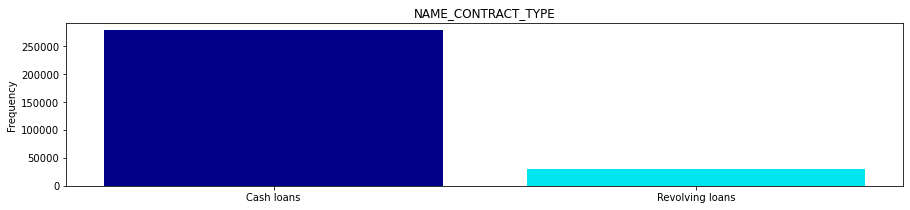

NAME_CONTRACT_TYPE: 
 Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


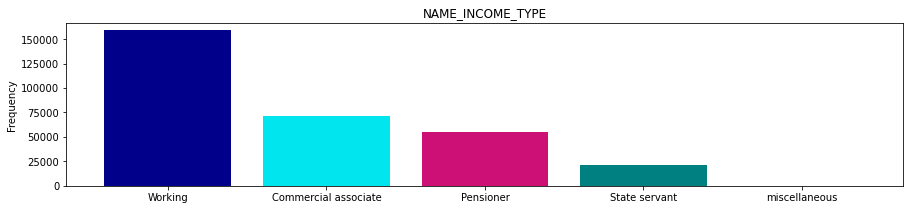

NAME_INCOME_TYPE: 
 Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
miscellaneous               55
Name: NAME_INCOME_TYPE, dtype: int64


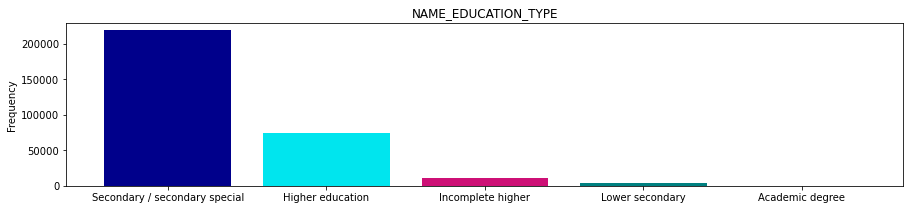

NAME_EDUCATION_TYPE: 
 Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


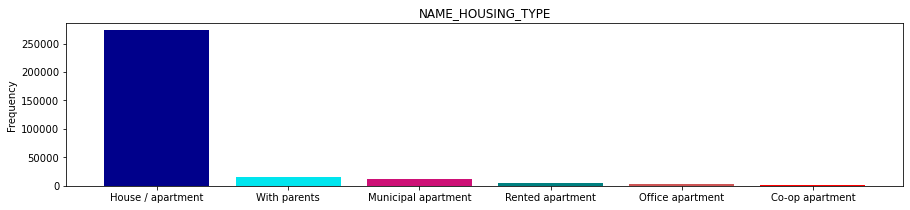

NAME_HOUSING_TYPE: 
 House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


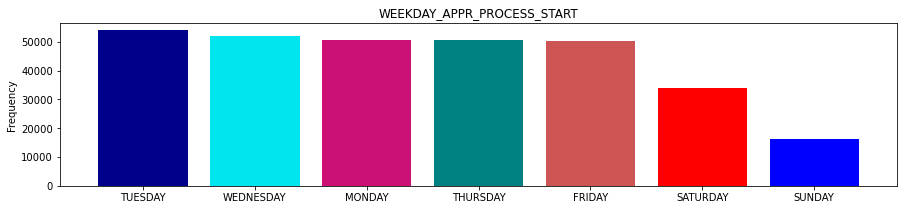

WEEKDAY_APPR_PROCESS_START: 
 TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


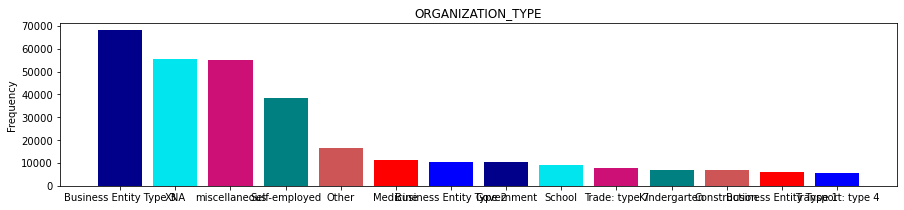

ORGANIZATION_TYPE: 
 Business Entity Type 3    67992
XNA                       55374
miscellaneous             55193
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Name: ORGANIZATION_TYPE, dtype: int64


In [100]:
#Plots and correlation
#Plotting the bar plots for all categorical variables
def bar_plot(dataset, variable):
    var =dataset[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

for c in cat_cols:
    bar_plot(loan, c)

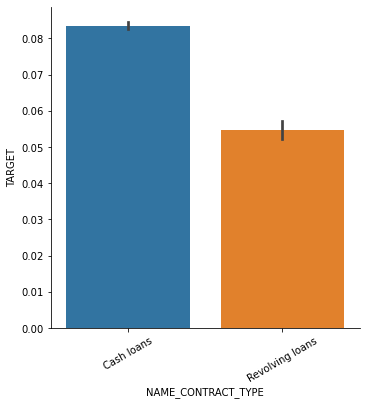

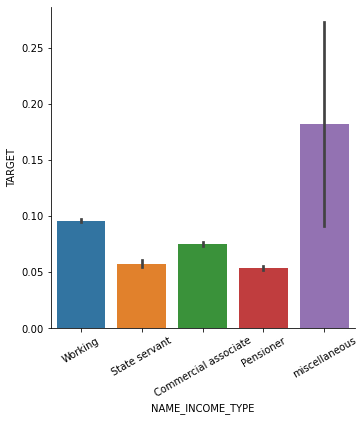

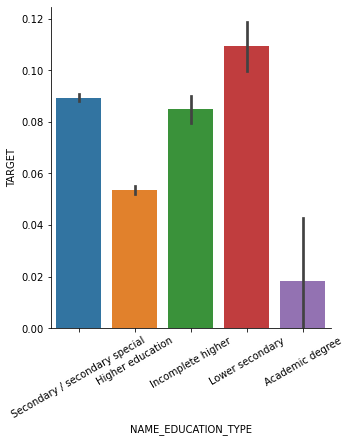

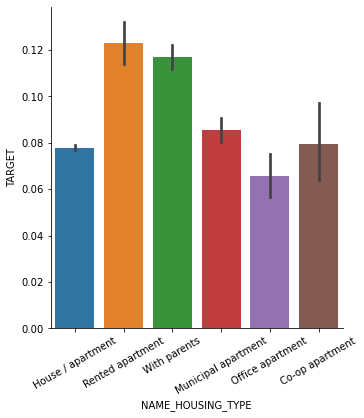

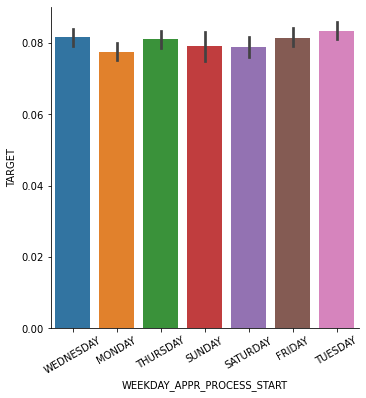

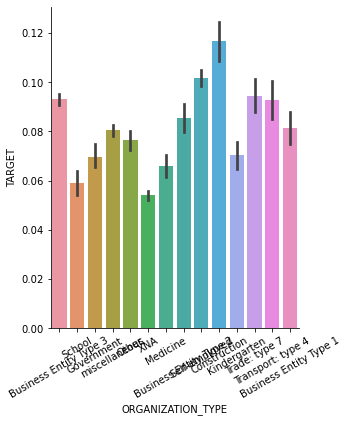

In [101]:
#PLotting target variable for different categorical columns
for c in cat_cols:
    g = sns.catplot(x=c, y="TARGET", kind="bar", orient="v", data=loan);
    g.set_xticklabels(rotation=30)

In [102]:
#Getting numerical columns
num_columns=loan.dtypes!='object'
num_cols = num_columns[num_columns].index
num_cols

Index(['TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

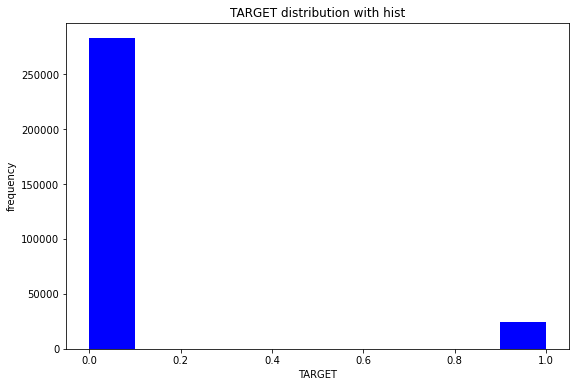

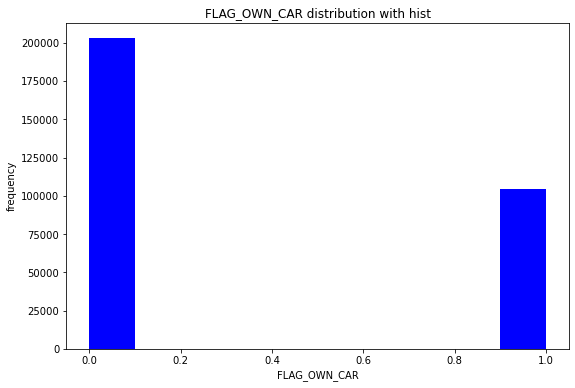

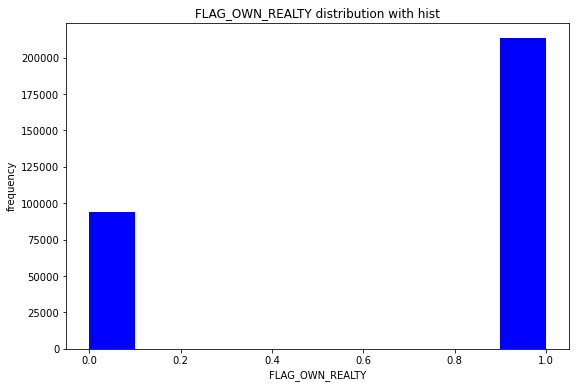

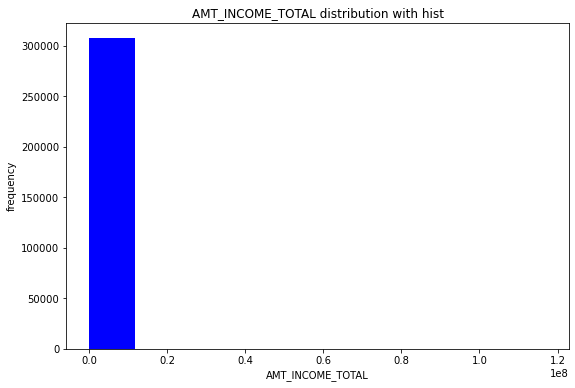

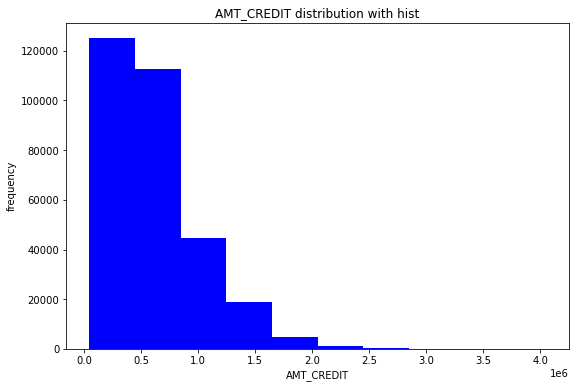

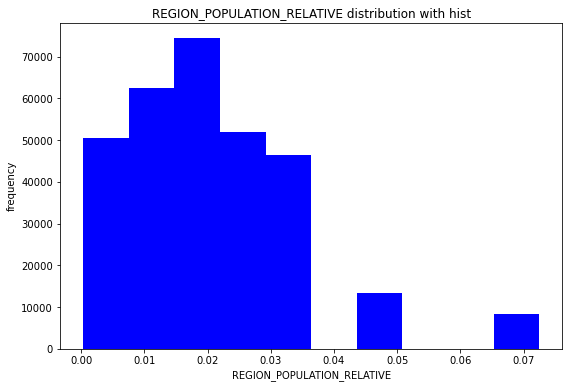

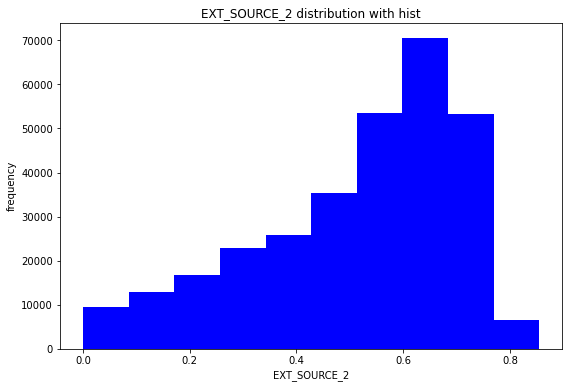

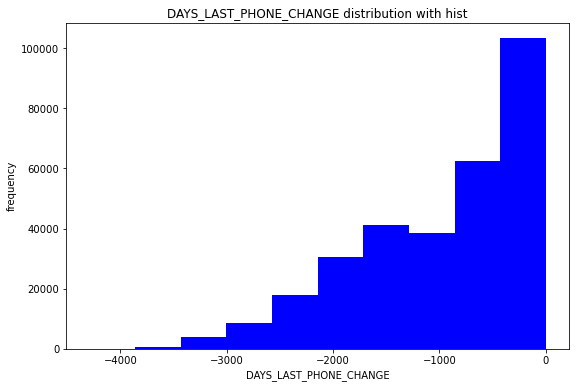

In [103]:
#Plotting histograms for numeric variables

def plot_hist(dataset, variable):
    plt.figure(figsize=(9,6))
    plt.hist(dataset[variable], bins=10,color='blue')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    
for n in num_cols:
    plot_hist(loan, n)

In [104]:
loan.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
0,1,Cash loans,0,1,202500.0,406597.5,Working,Secondary / secondary special,House / apartment,0.018801,WEDNESDAY,Business Entity Type 3,0.262949,-1134.0
1,0,Cash loans,0,0,270000.0,1293502.5,State servant,Higher education,House / apartment,0.003541,MONDAY,School,0.622246,-828.0
2,0,Revolving loans,1,1,67500.0,135000.0,Working,Secondary / secondary special,House / apartment,0.010032,MONDAY,Government,0.555912,-815.0
3,0,Cash loans,0,1,135000.0,312682.5,Working,Secondary / secondary special,House / apartment,0.008019,WEDNESDAY,Business Entity Type 3,0.650442,-617.0
4,0,Cash loans,0,1,121500.0,513000.0,Working,Secondary / secondary special,House / apartment,0.028663,THURSDAY,miscellaneous,0.322738,-1106.0


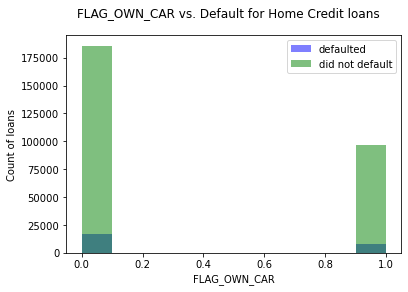

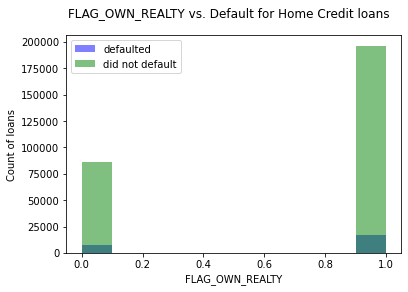

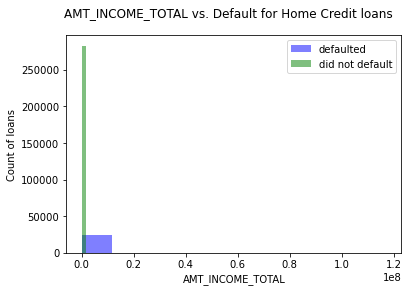

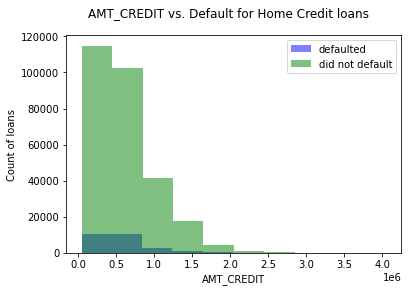

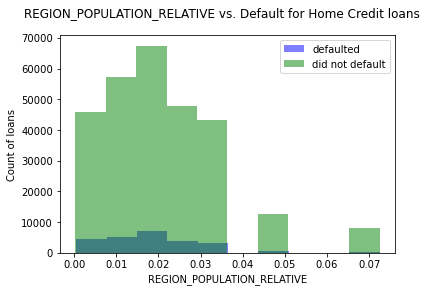

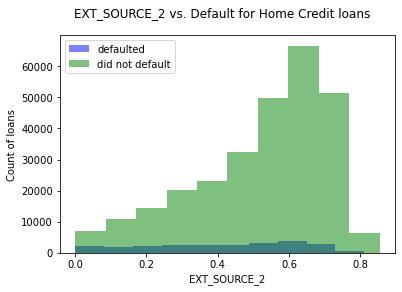

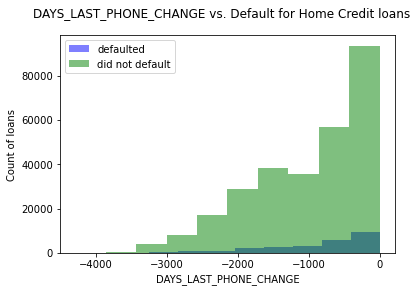

In [105]:
#Plotting dependent variable by different numeric variables
for n in num_cols[1:]:
    fig, ax = plt.subplots()
    ax.hist(loan[loan["TARGET"]==1][n], bins=10, alpha=0.5, color="blue", label="defaulted")
    ax.hist(loan[loan["TARGET"]==0][n], bins=10, alpha=0.5, color="green", label="did not default")
    ax.set_xlabel(n)
    ax.set_ylabel("Count of loans")
    fig.suptitle(f'{n} vs. Default for Home Credit loans')

    ax.legend();

In [106]:
loan_num = loan[num_cols]
loan_cat = loan[cat_cols]

#Using SimpleImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

si_median = SimpleImputer(strategy='median')

loan_imp = si_median.fit_transform(loan_num) #Will need to convert to DataFrame
df_loan_num = pd.DataFrame(loan_imp, columns=loan_num.columns)


In [107]:
df_loan_num.shape

(307511, 8)

In [108]:
loan_cat.shape

(307511, 6)

In [109]:
df = pd.concat([df_loan_num, loan_cat],axis=1)

In [110]:
df.isna().sum()

TARGET                        0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
REGION_POPULATION_RELATIVE    0
EXT_SOURCE_2                  0
DAYS_LAST_PHONE_CHANGE        0
NAME_CONTRACT_TYPE            0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_HOUSING_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

<AxesSubplot:>

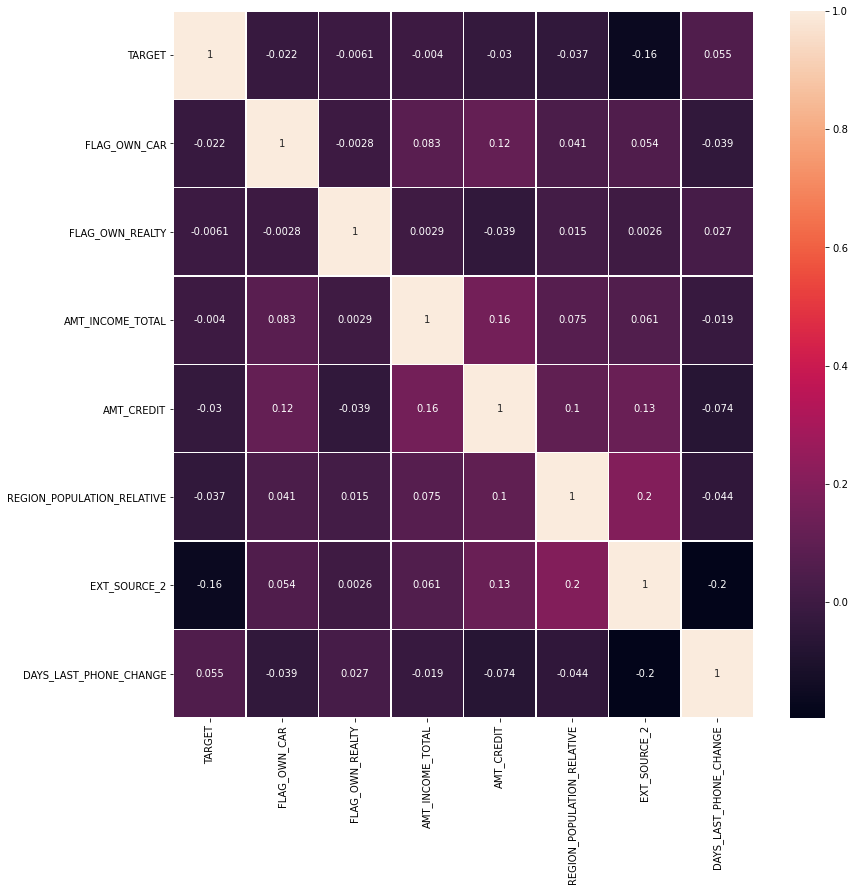

In [112]:
#Plotting correlation
fig, ax = plt.subplots(figsize=(13,13))         

# Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [113]:
#Get dummies so that model can built
df_dummies = pd.get_dummies(df, drop_first=True)

In [114]:
df_dummies.shape

(307511, 41)

In [115]:
X = df_dummies.drop(columns='TARGET')
y = df_dummies['TARGET']



In [116]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1.0: 282686, 0.0: 282686})


In [117]:
#Split into test / train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2) 
X_train.shape


(452297, 40)

In [118]:
#Scale features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [119]:
#Building out logistic regression model
logreg=LogisticRegression()
logreg.fit(X_train_sc, y_train)
print(logreg.score(X_train_sc, y_train), logreg.score(X_test_sc, y_test))

0.917638189066034 0.9180101702409905


In [120]:
#PLotting the key coefficients that drive default favorably or unfavorably
coef= logreg.coef_[0]
coef_df = pd.DataFrame({'coefficients': coef, 'features': X_train.columns}).sort_values(by = 'coefficients', ascending = False, key = abs).head(10)
coef_df

,coefficients,features
15,-2.369315,NAME_EDUCATION_TYPE_Secondary / secondary special
12,-2.118030,NAME_EDUCATION_TYPE_Higher education
28,-1.284086,ORGANIZATION_TYPE_Business Entity Type 3
39,-1.225599,ORGANIZATION_TYPE_miscellaneous
16,-1.190270,NAME_HOUSING_TYPE_House / apartment
8,-1.127997,NAME_INCOME_TYPE_Pensioner
35,-1.025299,ORGANIZATION_TYPE_Self-employed
13,-0.799090,NAME_EDUCATION_TYPE_Incomplete higher
33,-0.726744,ORGANIZATION_TYPE_Other
32,-0.615471,ORGANIZATION_TYPE_Medicine


In [ ]:
## Top variables:  more days employed implues less

In [121]:
y_preds = logreg.predict(X_test_sc)

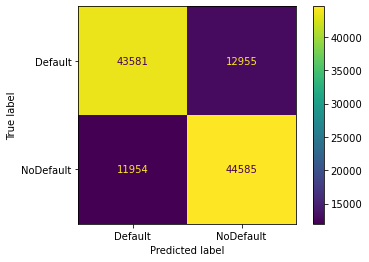

In [130]:
# showing predictions vs true status where 0=expired and 1=funded for Numeric
num_cm = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(num_cm, display_labels = ['Default', 'NoDefault']).plot();

In [123]:
#Classification report for model after SMOTE
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     56536
         1.0       0.96      0.88      0.91     56539

    accuracy                           0.92    113075
   macro avg       0.92      0.92      0.92    113075
weighted avg       0.92      0.92      0.92    113075



In [124]:
#Building out DecisionTree
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50,
                       min_samples_split=100)
dt.fit(X_train_sc, y_train)
print(dt.score(X_train_sc, y_train), dt.score(X_test_sc, y_test))

0.7791318536271521 0.7797125801459208


In [125]:
y_preds = dt.predict(X_test_sc)
#Classification report for model after SMOTE
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78     56536
         1.0       0.77      0.79      0.78     56539

    accuracy                           0.78    113075
   macro avg       0.78      0.78      0.78    113075
weighted avg       0.78      0.78      0.78    113075



<Figure size 7200x2160 with 0 Axes>

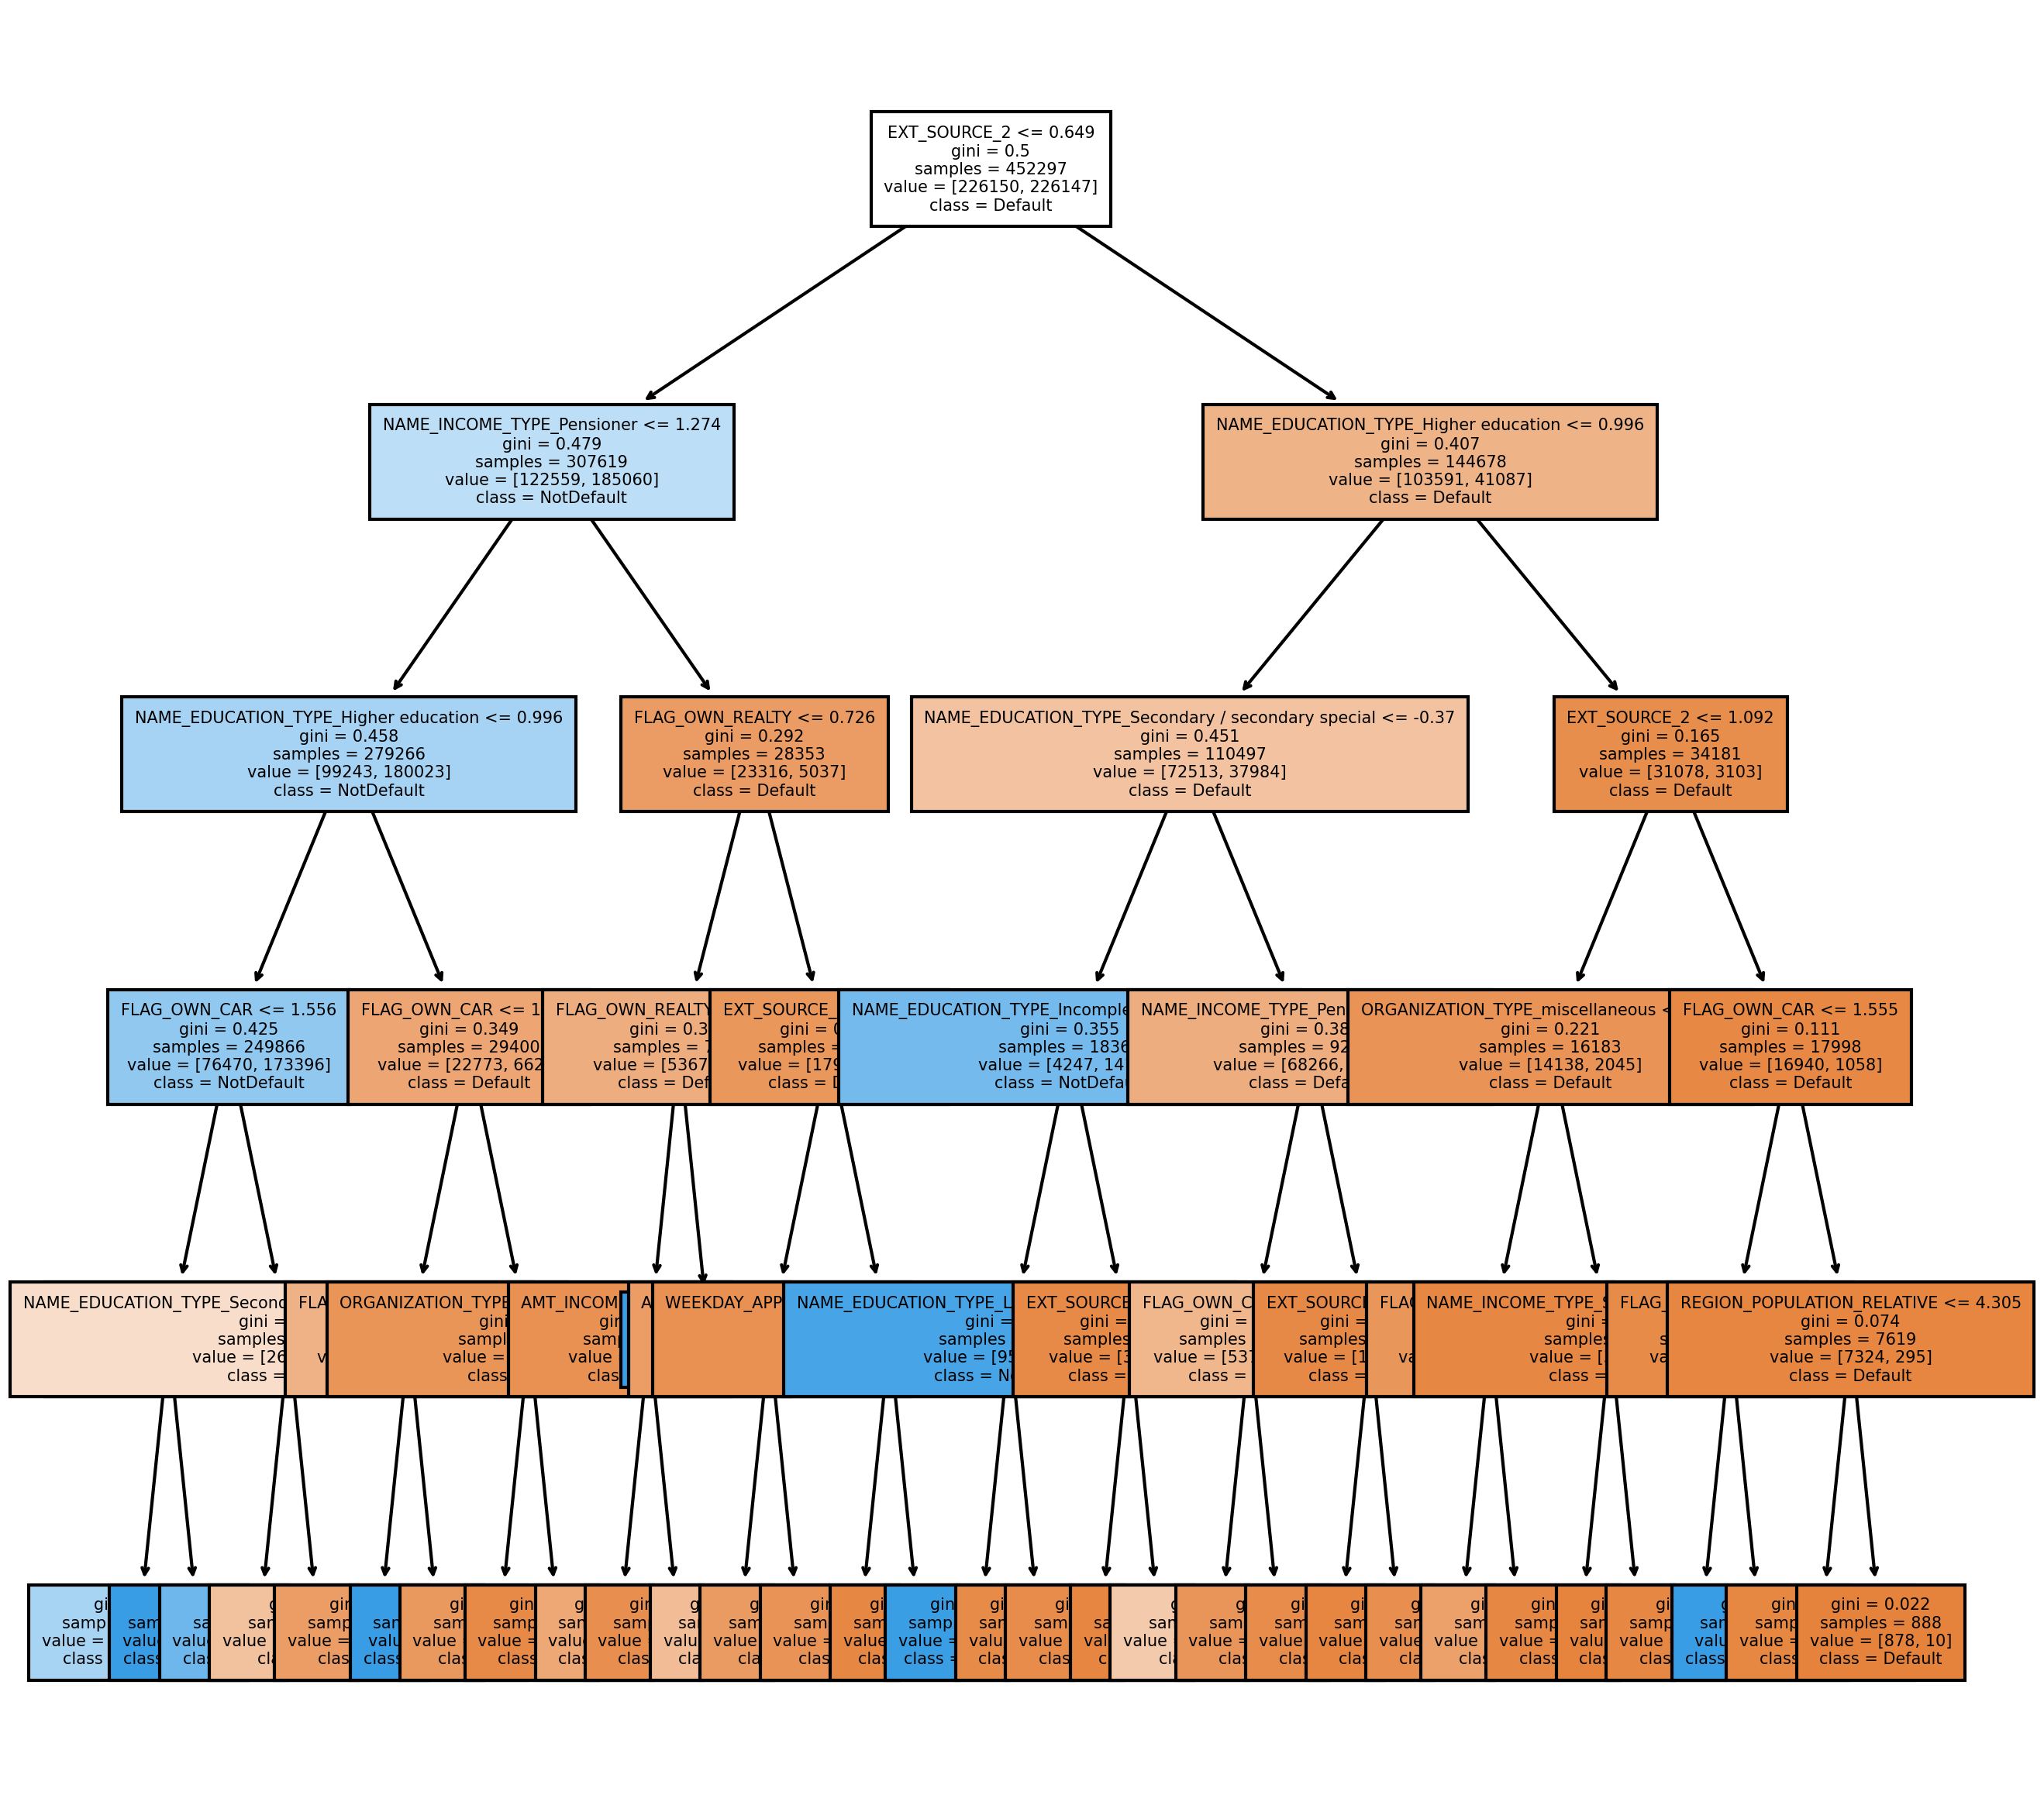

In [129]:
# Establish size of figure.
plt.figure(figsize = (100, 30))

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
#tree.plot_tree(model_gini_class, filled=True)

# Plot our tree
plot_tree(dt,
          feature_names = X_train.columns,
          class_names = ['Default', 'NotDefault'],
          fontsize=5,
          filled = True);